In [92]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sqlalchemy import create_engine
import statsmodels.api as sm
import pandas_profiling
import warnings
import missingno as msno
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from statsmodels.tsa.stattools import acf
from scipy.stats import bartlett
from scipy.stats import levene
from scipy.stats.mstats import winsorize

In [93]:
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

weather_df_copy = weather_df.copy()

weather_df_copy.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [94]:
weather_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 7.7+ MB


In [95]:
weather_df_copy.describe()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [96]:
weather_df_copy = weather_df_copy.iloc[:,[3,5,6,7,10]]

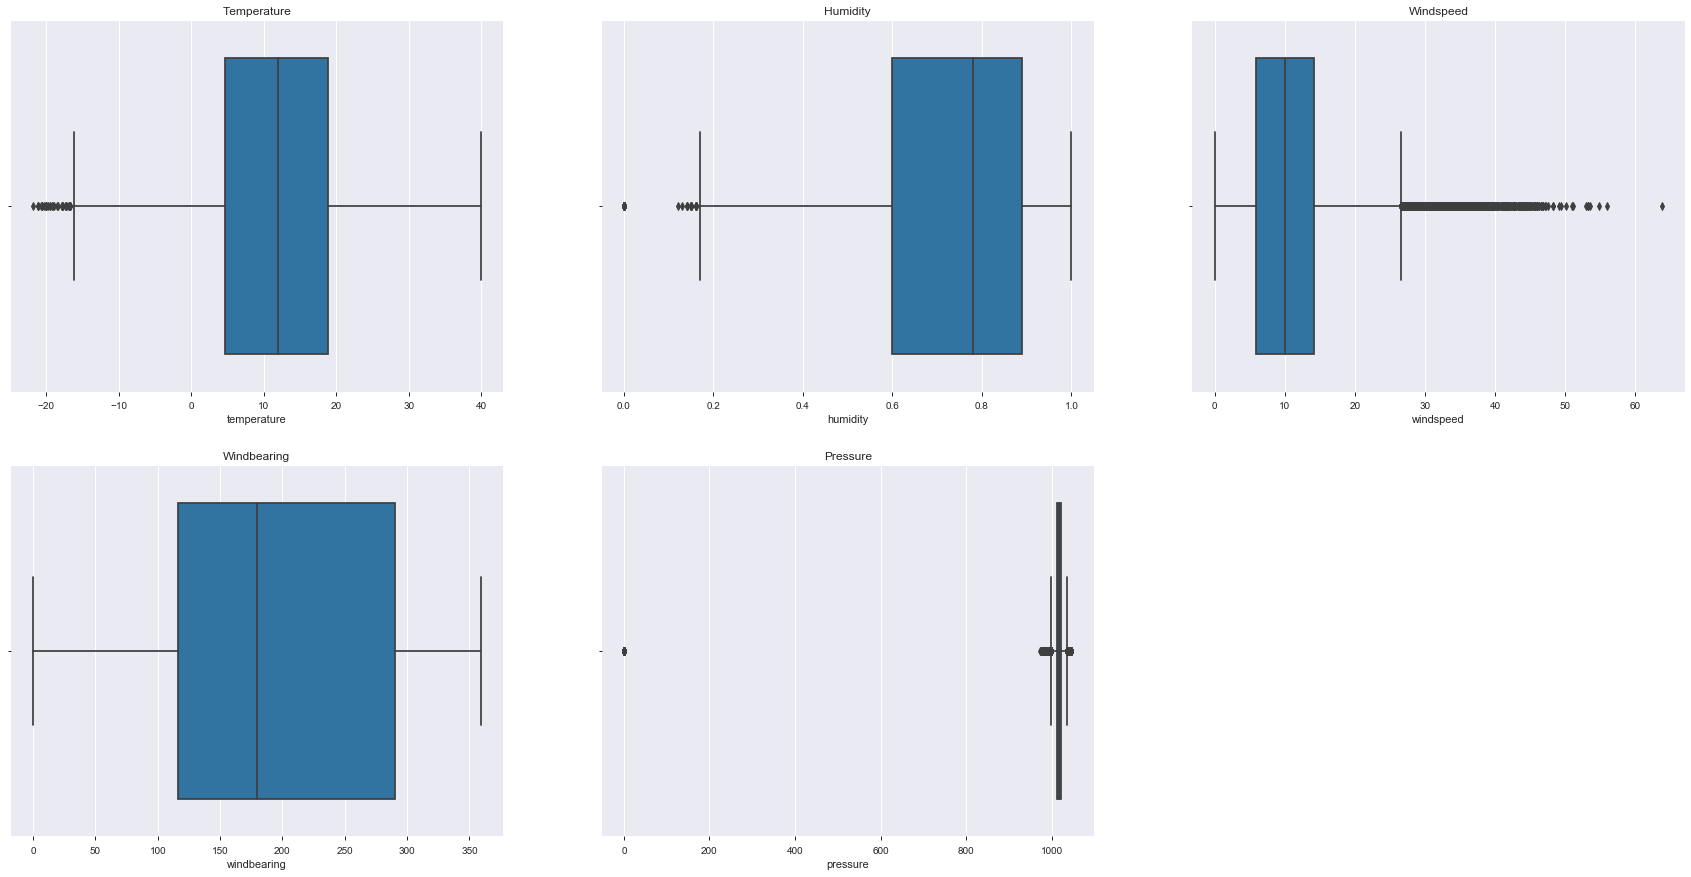

In [97]:
plt.figure(figsize = (30,15))

plt.subplot(2,3,1)
sns.boxplot(weather_df_copy['temperature'])
plt.title('Temperature')

plt.subplot(2,3,2)
sns.boxplot(weather_df_copy['humidity'])
plt.title('Humidity')

plt.subplot(2,3,3)
sns.boxplot(weather_df_copy['windspeed'])
plt.title('Windspeed')

plt.subplot(2,3,4)
sns.boxplot(weather_df_copy['windbearing'])
plt.title('Windbearing')

plt.subplot(2,3,5)
sns.boxplot(weather_df_copy['pressure'])
plt.title('Pressure')

plt.show()

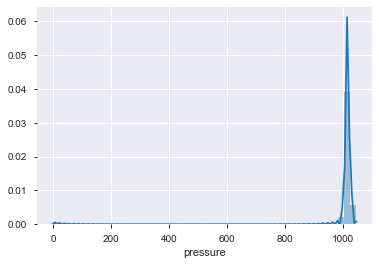

In [98]:
sns.distplot(weather_df_copy.pressure)
plt.show()

In [99]:
n = -1
for row in weather_df_copy.pressure:
    n+=1
    if row == 0:
        weather_df_copy.iloc[n,4] = weather_df_copy['pressure'].median()

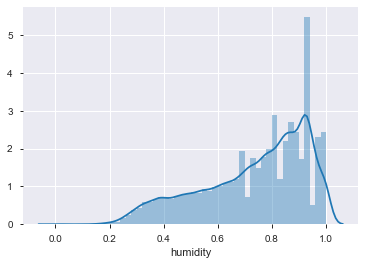

In [100]:
sns.distplot(weather_df_copy.humidity)
plt.show()

In [101]:
n = -1
for row in weather_df_copy.humidity:
    n+=1
    if row == 0:
        weather_df_copy.iloc[n,1] = weather_df_copy['humidity'].median()

In [102]:
weather_df_cln = weather_df_copy

weather_df_cln.loc[:, 'humidity'] +=1
weather_df_cln.humidity = boxcox(weather_df_cln.humidity)[0]
weather_df_cln.loc[:, 'windspeed'] +=1
weather_df_cln.windspeed = boxcox(weather_df_cln.windspeed)[0]
weather_df_cln.loc[:, 'windbearing'] +=1
weather_df_cln.windbearing = boxcox(weather_df_cln.windbearing)[0]
weather_df_cln.pressure = boxcox(weather_df_cln.pressure)[0]

In [104]:
weather_df_copy.corr()

,temperature,humidity,windspeed,windbearing,pressure
temperature,1.000000,-0.613607,0.022399,0.028870,-0.302958
humidity,-0.613607,1.000000,-0.251457,-0.000738,0.039062
windspeed,0.022399,-0.251457,1.000000,0.119304,-0.249122
windbearing,0.028870,-0.000738,0.119304,1.000000,-0.087561
pressure,-0.302958,0.039062,-0.249122,-0.087561,1.000000


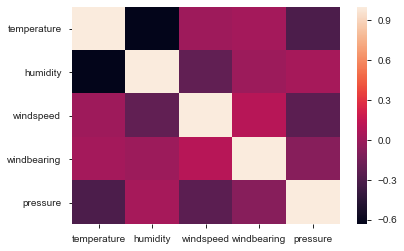

In [59]:
sns.heatmap(weather_df_copy.corr())
plt.show()

In [105]:
Y = weather_df_cln.temperature
X = weather_df_cln.iloc[:,1:]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 2.412e+04
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:11:09   Log-Likelihood:            -3.2109e+05
No. Observations:               96453   AIC:                         6.422e+05
Df Residuals:                   96448   BIC:                         6.422e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.692e+07    1.2e+05    140.918      0.000    1.67e+07    1.72e+07
humidity       -6.0992      0.022   -279.611      0.000      -6.142      -6.056
windspeed      -1.4856      0.016    -93.799      0.000      -1.517      -1.455
windbearing     0.0078      0.001     11.591      0.000       0.006       0.009
pressure    -2.708e+07   1.92e+05   -140.918      0.000   -2.75e+07   -2.67e+07
==============================================================================
Omnibus:                     2317.701   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2488.533
Skew:                          -0.393   Prob(JB):                         0.00
Kurtosis:                       2.969   Cond. No.                     7.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Assumption 1

The model was built correctly and the model seems linear with respect to the coefficients in the model.

### Assumption 2

In [106]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)


predictions = lrm.predict(X)
errors = Y - predictions

In [108]:
errors.mean()

1.823506203190094e-09

As seen above, the mean error is extremely small and basically 0.

### Assumption 3

In [109]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 0.00291086 and p value is 0.957
Levene test statistic value is 73.1414 and p value is 1.22e-17


According to the Bartlett test, the errors are homoscedasticity.

### Assumption 4

In [110]:
weather_df_copy.corr()

,temperature,humidity,windspeed,windbearing,pressure
temperature,1.000000,-0.613607,0.022399,0.028870,-0.302958
humidity,-0.613607,1.000000,-0.251457,-0.000738,0.039062
windspeed,0.022399,-0.251457,1.000000,0.119304,-0.249122
windbearing,0.028870,-0.000738,0.119304,1.000000,-0.087561
pressure,-0.302958,0.039062,-0.249122,-0.087561,1.000000


By looking at the correlation matrix, we see that there are no medium or high correlations between the variables.

### Assumption 5

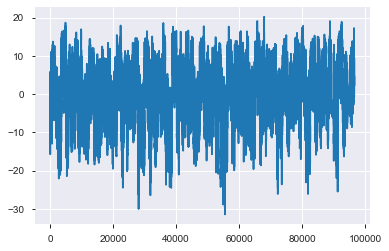

In [113]:
plt.plot(errors)
plt.show()

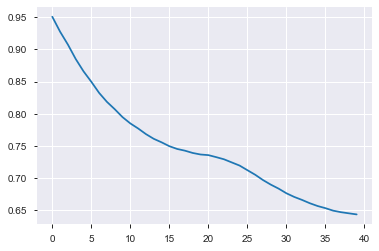

In [114]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

According to the autocorrelation function, our errors are highly correlated. This may be due to the exclusion of other variables.

### Assumption 6

In [115]:
weather_df_copy['errors'] = errors

In [118]:
weather_df_copy.corr().errors

temperature    7.070454e-01
humidity       2.457115e-13
windspeed     -4.901874e-13
windbearing   -7.533925e-13
pressure       9.009339e-13
errors         1.000000e+00
Name: errors, dtype: float64

According to the correlation values, none of the features are correlated with the errors.